In [74]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt



In [75]:
df=pd.read_csv('wine.csv',header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [76]:
# add header
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [77]:
#Checking missing Values
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

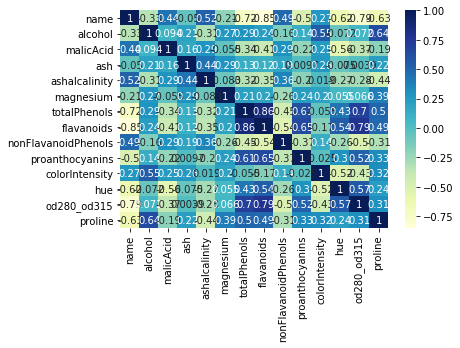

In [78]:
# using heatmap for Correlation of Parameters
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

In [79]:
# as ash' is the least correlated. So, drop it.
X= df.drop(['name','ash'], axis=1)
X.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [80]:
Y=df.iloc[:,:1]
Y.head()

,name
0,1
1,1
2,1
3,1
4,1


In [81]:
# use Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 12)
(54, 12)


In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))

print('Models appended...')


Models appended...


In [83]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

Logistic Regression: 95.96153846153845
Naive Bayes: 96.02564102564102
K-Nearest Neighbour: 71.92307692307692
Decision Tree: 87.1794871794872
Support Vector Machine-linear: 96.02564102564102
Support Vector Machine-rbf: 62.11538461538463
Random Forest: 97.62820512820512
MLP: 42.628205128205124


In [84]:
# This is a basic analysis and classification without much optimization. 
#Results of accuracy over 95% denotes the quality of data being very good, which makes it easy for classification. 